load data and create dataframes

In [1]:
import itertools
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
from pathlib import Path
from tqdm.notebook import tqdm
import os
import zipfile
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import v2
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader, random_split
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, confusion_matrix

random.seed(89034320423)

In [2]:
device_name = "cpu"  # default device is CPU
if torch.cuda.is_available():
    device_name = "cuda"  # CUDA for NVIDIA GPU
elif torch.backends.mps.is_available():
    device_name = torch.device("mps")  # Metal Performance Shaders for Apple M-series GPU
device = torch.device(device_name)
print(device_name)

mps


data transformations

In [3]:
root_dir = './cifake'

# Compose your transformations
transform = v2.Compose([
    v2.RandomResizedCrop(size=(32,32), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToTensor(),
])


test_transform = v2.Compose([
    v2.RandomResizedCrop(size=(32,32), antialias=True),
    v2.ToTensor(),
])

dataset = ImageFolder(root=f"{root_dir}/train", transform=transform)
test_dataset = ImageFolder(root=f"{root_dir}/test", transform=test_transform)

train_size = int(0.8 * len(dataset)) #TODO change
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=100, shuffle=True,num_workers=2)
test_loader= DataLoader(test_dataset, batch_size=100, shuffle=False,num_workers=2)

/Users/blake/miniforge3/envs/cs349/lib/python3.9/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [4]:
class EarlyStopper:
  def __init__(self, patience, min_delta):
      self.patience = patience
      self.min_delta = min_delta
      self.counter = 0
      self.min_validation_loss = float('inf')

  def early_stop(self, validation_loss):
      if validation_loss < self.min_validation_loss:
          self.min_validation_loss = validation_loss
          self.counter = 0
      elif validation_loss > (self.min_validation_loss + self.min_delta):
          self.counter += 1
          if self.counter >= self.patience:
              return True
      return False

In [5]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.batchnorm1 = nn.BatchNorm2d(64)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.batchnorm2 = nn.BatchNorm2d(128)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.batchnorm3 = nn.BatchNorm2d(256)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 8 * 8, 256)
        self.relu4 = nn.ReLU()
        self.batchnorm4 = nn.BatchNorm1d(256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.relu5 = nn.ReLU()
        self.fc3 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.batchnorm1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.batchnorm2(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.relu3(x)
        x = self.batchnorm3(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.batchnorm4(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu5(x)
        x = self.fc3(x)

        return x


Epochs:


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.378145 

Validation accuracy: 0.816300 

Validation F1: 0.816300 

Validation mcc: 0.641532 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.365530 

Validation accuracy: 0.838000 

Validation F1: 0.838000 

Validation mcc: 0.675967 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.414851 

Validation accuracy: 0.784700 

Validation F1: 0.784700 

Validation mcc: 0.585714 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.281253 

Validation accuracy: 0.872150 

Validation F1: 0.872150 

Validation mcc: 0.747081 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.279545 

Validation accuracy: 0.878900 

Validation F1: 0.878900 

Validation mcc: 0.758274 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.271055 

Validation accuracy: 0.884700 

Validation F1: 0.884700 

Validation mcc: 0.769582 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.261827 

Validation accuracy: 0.884350 

Validation F1: 0.884350 

Validation mcc: 0.769294 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.263392 

Validation accuracy: 0.884150 

Validation F1: 0.884150 

Validation mcc: 0.769543 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.259642 

Validation accuracy: 0.887000 

Validation F1: 0.887000 

Validation mcc: 0.774348 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.259872 

Validation accuracy: 0.887350 

Validation F1: 0.887350 

Validation mcc: 0.775770 

Evaluating on test set:


  0%|          | 0/200 [00:00<?, ?it/s]

Test accuracy: 0.8874
Test F1: 0.8874
Test MCC: 0.7762934726635999


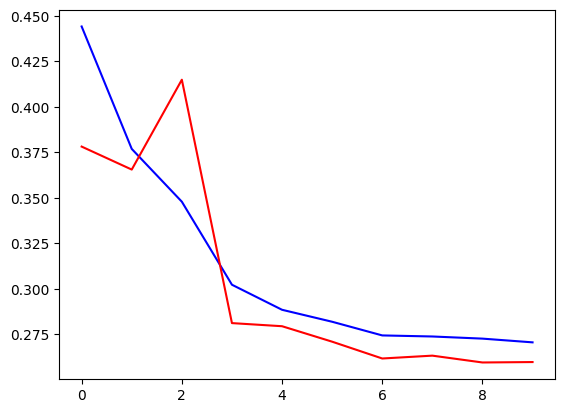

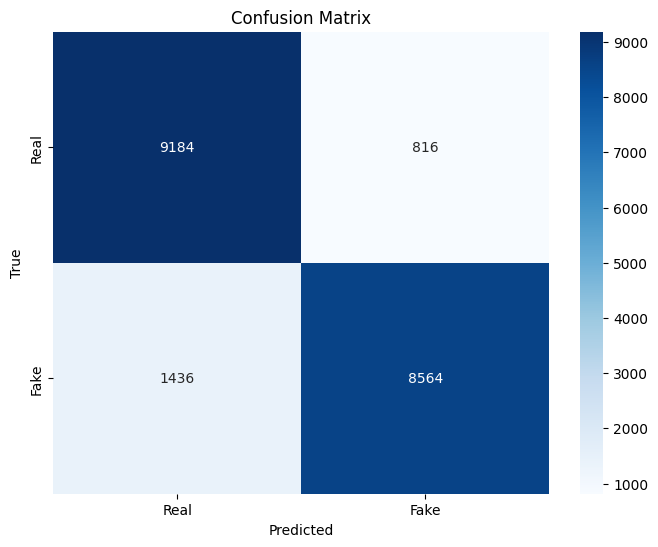

In [6]:
# Wrap your training loop with the Bottleneck profiler

def train(dataloader , model , loss_func, optimizer):

      model.train()
      train_loss = []

      for input, target in tqdm(dataloader):

          input, target = input.to(device), target.to(device)
          pred = model(input)
          pred = torch.squeeze(pred)
          loss = loss_func(pred, target.float())
          #backpropagation
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          train_loss.append(loss.item())
      return train_loss

def validate(dataloader, model, loss_func, threshold=0.5):
    model.eval()
    
    num_batches = len(dataloader)
    test_loss= 0
    y_true = []
    y_pred = []

    with torch.no_grad():
      for input, target in tqdm(dataloader):
            input, target = input.to(device), target.to(device)
            pred = model(input)
            pred = torch.squeeze(pred)
            test_loss += loss_func(pred, target.float()).item()
            predicted = (pred >= threshold).float()
            y_true.extend(target.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
          
    test_loss /= num_batches
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="micro")
    mcc = matthews_corrcoef(y_true, y_pred)
    print(f"Validation loss: {test_loss:>8f} \n")
    print(f"Validation accuracy: {acc:>8f} \n")
    print(f"Validation F1: {f1:>8f} \n")
    print(f"Validation mcc: {mcc:>8f} \n")
    return test_loss


def test(dataloader, model, threshold=0.5):
    model.eval()

    y_true = []
    y_pred = []

    with torch.no_grad():
        print("Evaluating on test set:")
        for input, target in tqdm(dataloader):
            input, target = input.to(device), target.to(device)
            pred = model(input)
            pred = torch.squeeze(pred)
            predicted = (pred >= threshold).float()
            y_true.extend(target.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    return {
                "y_true": y_true,
                "y_pred": y_pred,
                "acc": accuracy_score(y_true, y_pred),
                "f1": f1_score(y_true, y_pred, average="micro"),
                "mcc": matthews_corrcoef(y_true, y_pred)
            }


def classify():
    early_stopper = EarlyStopper(patience=2, min_delta=0.01)
    
    input_size = 32*32
    output_size= 1 #isn't this supposed to be 2? for classifications (AI, Human)? #no it's 1 for binary classification
    model = CNN().to(device)
    loss_fun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr = 1e-3)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
    epochs = 10
    train_loss = []
    test_loss = []

    print("Epochs:")
    for t in tqdm(range(epochs)):
        losses = train(train_loader, model, loss_fun, optimizer)
        train_loss.append(losses)
        validation_loss = validate(val_loader, model, loss_fun)
        test_loss.append(validation_loss)
        if early_stopper.early_stop(validation_loss):
            print("early stop")
            break
        scheduler.step()

    plt.plot([i for i in range(len(train_loss))], torch.tensor(train_loss).mean(axis=1), color="blue") #training loss
    plt.plot([i for i in range(len(test_loss))], test_loss, color="red") #testing loss
    result = test(test_loader, model)
    print(f"Test accuracy: {result['acc']}")
    print(f"Test F1: {result['f1']}")
    print(f"Test MCC: {result['mcc']}")

    conf_matrix = confusion_matrix(result["y_true"], result["y_pred"])

    # Plot confusion matrix
    labels = ['Real', 'Fake']
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

classify()